# Homework 7


You are waiting on some datasets from different teams but the approval process may take some time. 

You have no intention to wait! You will generate some fake data to get started. 

Here are some info you expect from the management:
* Employees dataset contains employee id, name, lastname, phone, state (~ 10K records) (Use states of US east coast only) 
* Salary dataset contains employee id, department id, yearly salary
* Department dataset contains department id, department name (5-10 departments) 

Here are the questions expected to be answered:

1. Visualize the average salary of each department
1. Visualize the total number of employees living in each state for each department
1. Visualize salary distribution of different states
1. Visualize salary distribution of different departments

You can use faker library (but you don't have to): https://faker.readthedocs.io/en/master/

`Optional:` 

Try to make dataframes realistic. 
* Salary distribution as normal distribution
* Salary of different states can be higher for 5-10K compared to other states


#### Importing Libs

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

#### Setting up Faker lib

In [2]:
from faker import Faker
from faker.providers import internet
Faker.seed(42)
fake = Faker(locale='en_US')

#### Phone Number function to avoid anamolies from fake.phone_number()

In [3]:
import phonenumbers
def phone_gen():
    num_obj=phonenumbers.parse(fake.phone_number(), "US")
    interanational_IN_number = phonenumbers.format_number(num_obj, phonenumbers.PhoneNumberFormat.INTERNATIONAL)
    return interanational_IN_number[:14]

In [4]:
phone_gen()

'+1 1043321819 '

#### List of eastern states to consider

In [5]:
east_state = ['Connecticut', 
              'Delaware', 
              'Florida', 
              'Georgia', 
              'Maine', 
              'Maryland', 
              'Massachusetts', 
              'New Hampshire', 
              'New Jersey', 
              'New York', 
              'North Carolina', 
              'Pennsylvania', 
              'Rhode Island', 
              'South Carolina',
              'Virginia']

#### Making Employees Dataset

In [7]:
employees = [{
                'emp_id':'',
                'emp_fname':fake.first_name(),
                'emp_lname':fake.last_name(),
                'emp_phone':phone_gen(),
                'emp_state':fake.random_element(elements=east_state)
            } for i in range(0,11000)]
df_emp = pd.DataFrame(employees)
df_emp['emp_id']= range(10000,21000)

In [8]:
df_emp.tail(5)

,emp_id,emp_fname,emp_lname,emp_phone,emp_state
10995,20995,Andrew,Miller,+1 00148097981,Pennsylvania
10996,20996,Sally,Bryant,+1 1224295373,North Carolina
10997,20997,Audrey,Price,+1 767-461-637,Rhode Island
10998,20998,Donald,Martinez,+1 671-283-308,Maine
10999,20999,Stefanie,Miller,+1 933-031-095,Rhode Island


#### Making Department Dataset

In [9]:
# Department dataset contains department id, department name (5-10 departments)
df_dept = pd.DataFrame({'dept_id':list(range(1,11)),
                        'dept_name': ['IT',
                                      'Help Desk',
                                      'HR',
                                      'Production',
                                      'Inventory',
                                      'Finance',
                                      'Customer Support',
                                      'Marketing',
                                      'Legal',
                                      'Maintenance']})


In [10]:
df_dept.head()

,dept_id,dept_name
0,1,IT
1,2,Help Desk
2,3,HR
3,4,Production
4,5,Inventory


#### Making Salary Dataset

In [11]:
from numpy.random import seed
from numpy.random import normal

seed(1)

yr_salary = normal(loc=85000, scale=15000, size=11000)

In [12]:
#Salary dataset contains employee id, department id, yearly salary
salary = [{
            'emp_id': '',
            'dept_id': fake.random_element(elements=list(range(1,11))),
            'yr_salary':''
          } for i in range(11000)]

df_sal = pd.DataFrame(salary)
df_sal['emp_id']=range(10000,21000)
df_sal['yr_salary']=yr_salary

In [13]:
df_sal.tail(5)

,emp_id,dept_id,yr_salary
10995,20995,3,76666.389261
10996,20996,4,101518.931079
10997,20997,9,64689.469492
10998,20998,3,95471.289249
10999,20999,4,37398.075440


#### Making salary difference in each state

In [14]:
emp_sal=df_emp.merge(df_sal, on='emp_id')

In [15]:
sal_hike= [fake.random_number(digits=4) for i in range(1,16)]

In [16]:
for i in range(len(emp_sal)):
    state_name_row=emp_sal['emp_state'].iloc[i]
    state_index = east_state.index(state_name_row)
    emp_sal.at[i, 'yr_salary']= emp_sal.at[i,'yr_salary']+sal_hike[state_index]

In [17]:
pd.options.display.float_format = '{:.2f}'.format

In [18]:
emp_sal.head()

,emp_id,emp_fname,emp_lname,emp_phone,emp_state,dept_id,yr_salary
0,10000,Brian,Washington,+1 0799149371,New York,1,116572.18
1,10001,Christopher,Hill,+1 414-688-175,Delaware,3,80410.65
2,10002,Bobby,Bailey,+1 483-591-275,Massachusetts,1,78099.42
3,10003,Julie,Turner,+1 990-523-347,New Jersey,4,69683.47
4,10004,James,Simon,+1 640-585-881,New Jersey,8,98759.11


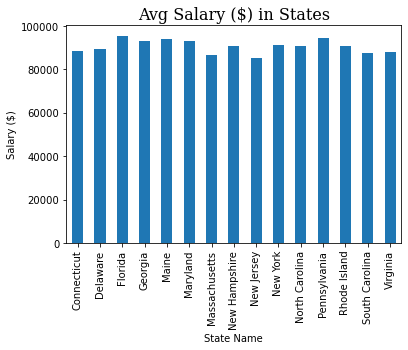

In [35]:
# Checking salary difference created (5-10k difference in each state):
emp_sal.groupby('emp_state')['yr_salary'].mean().plot(kind='bar')
plt.title('Avg Salary ($) in States', fontdict={'size':16, 'family':'serif'})
plt.xlabel("State Name")
plt.ylabel("Salary ($)")
plt.show()

### Visualize the average salary of each department

In [20]:
join_all = emp_sal.merge(df_dept, on='dept_id')

In [21]:
join_all

,emp_id,emp_fname,emp_lname,emp_phone,emp_state,dept_id,yr_salary,dept_name
0,10000,Brian,Washington,+1 0799149371,New York,1,116572.18,IT
1,10002,Bobby,Bailey,+1 483-591-275,Massachusetts,1,78099.42,IT
2,10009,Ricardo,Thompson,+1 00139519813,Maryland,1,89371.44,IT
3,10017,Melanie,Rose,+1 470-485-502,South Carolina,1,73908.12,IT
4,10060,Dorothy,Rios,+1 0173822606,New Jersey,1,74462.03,IT
...,...,...,...,...,...,...,...,...
10995,20912,Cynthia,Howard,+1 845-327-339,New Hampshire,10,106199.35,Maintenance
10996,20956,Scott,Herman,+1 416-508-569,New York,10,82902.79,Maintenance
10997,20971,Lori,Benitez,+1 658-090-364,Virginia,10,92129.43,Maintenance
10998,20976,Stacy,Thompson,+1 00138013674,New Hampshire,10,74293.45,Maintenance


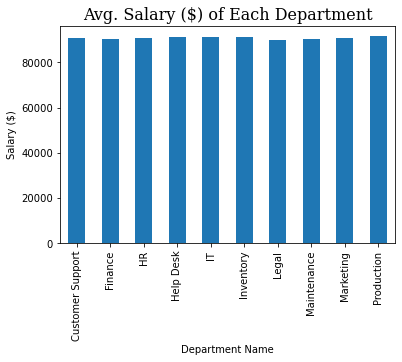

In [29]:
join_all.groupby('dept_name')['yr_salary']\
    .mean()\
    .plot(kind='bar')
plt.title('Avg. Salary ($) of Each Department', fontdict={'size':16, 'family':'serif'})
plt.xlabel('Department Name')
plt.ylabel('Salary ($)')
plt.show()

### Visualize the total number of employees living in each state for each department

In [24]:
emp_categorized = join_all.groupby(['emp_state','dept_name'])['emp_id'].count()

In [23]:
emp_categorized

emp_state    dept_name       
Connecticut  Customer Support    63
             Finance             77
             HR                  67
             Help Desk           59
             IT                  59
                                 ..
Virginia     Inventory           85
             Legal               78
             Maintenance         62
             Marketing           73
             Production          82
Name: emp_id, Length: 150, dtype: int64

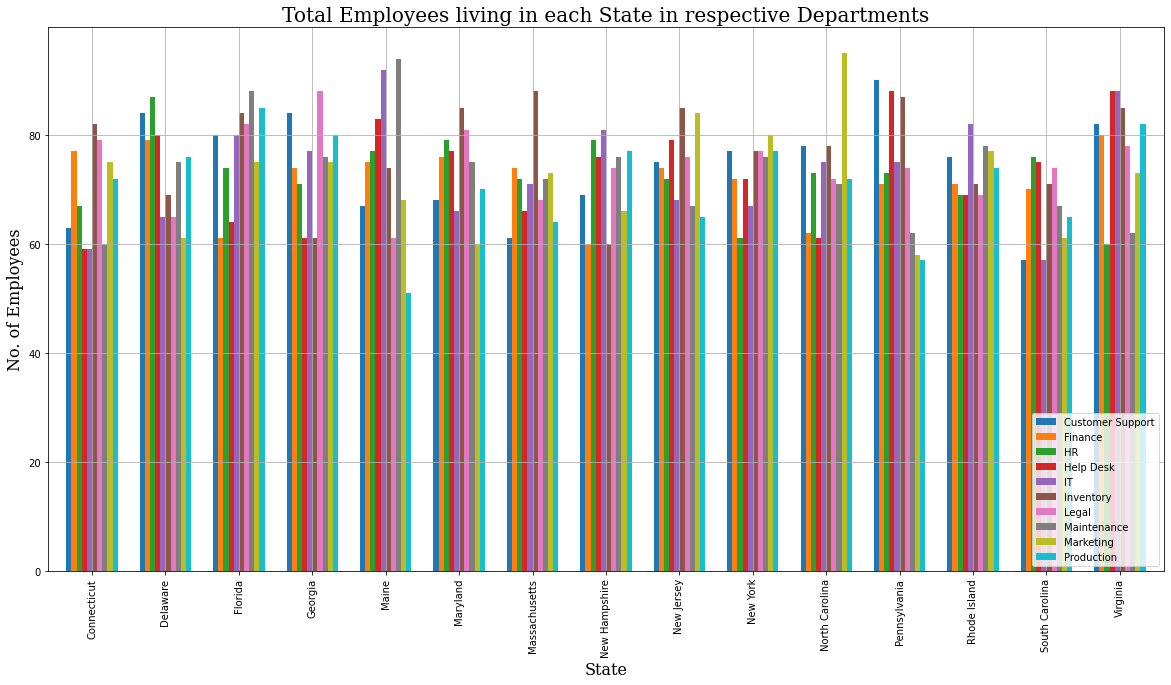

In [44]:
emp_categorized.unstack().plot(kind='bar', width=.7)
plt.title('Total Employees living in each State in respective Departments', fontdict={'size':20, 'family':'serif'})
plt.xlabel('State',fontdict={'size':16, 'family':'serif'})
plt.ylabel('No. of Employees',fontdict={'size':16, 'family':'serif'})
plt.gcf().set_size_inches(20, 10)
plt.legend(loc=4)
plt.grid()

### Visualize salary distribution of different states

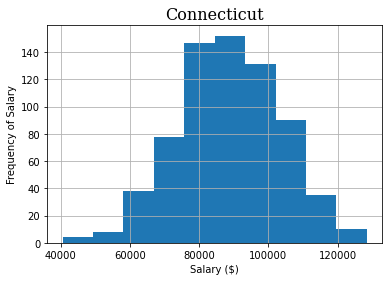

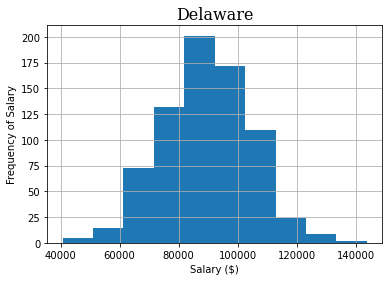

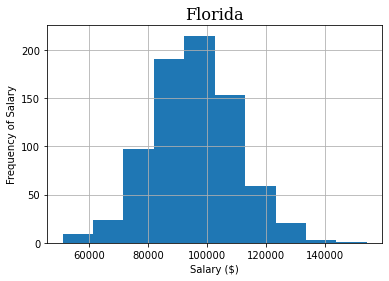

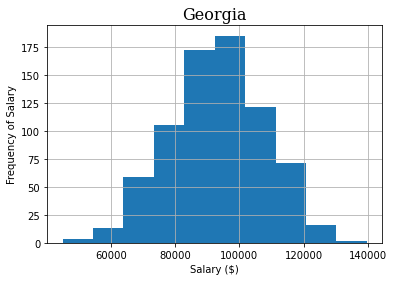

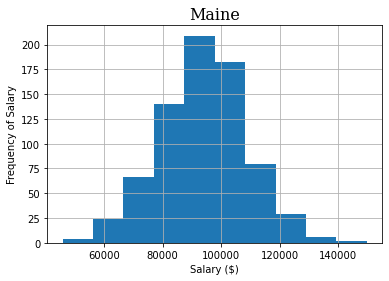

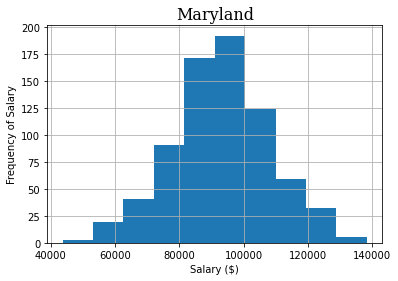

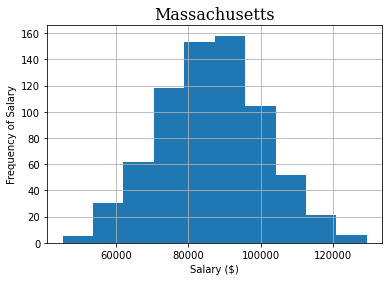

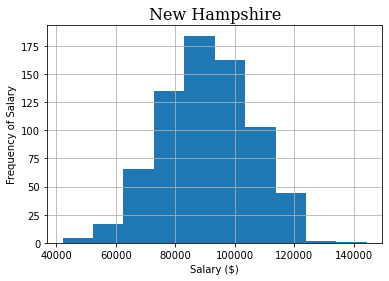

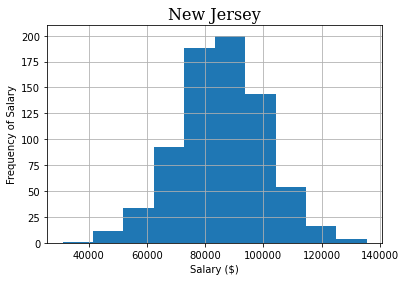

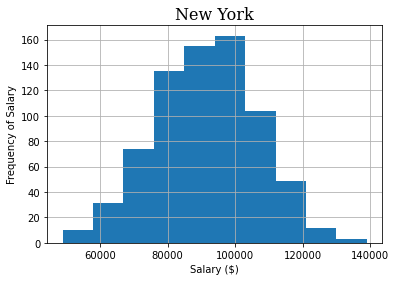

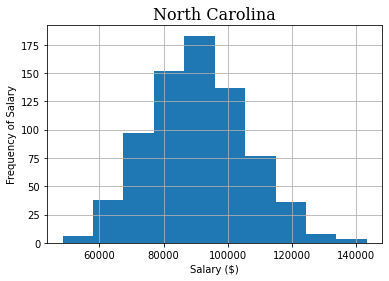

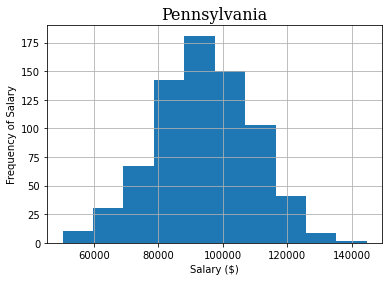

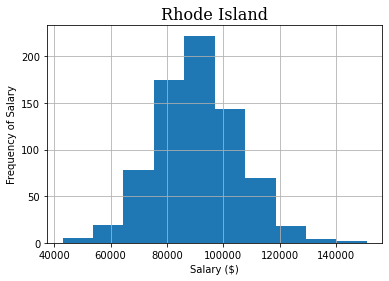

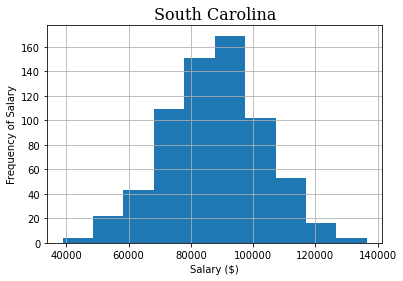

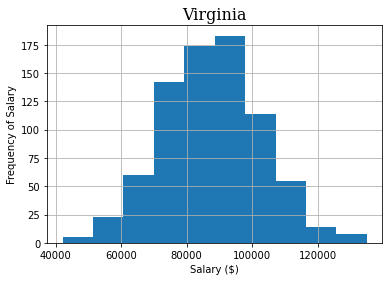

In [46]:
sal_by_state = join_all.groupby('emp_state')['yr_salary']
for i,j in sal_by_state:
    plt.hist(j.values)
    plt.title(i, fontdict={'size':16, 'family':'serif'})
    plt.xlabel('Salary ($)')
    plt.ylabel('Frequency of Salary')
    plt.grid()
    plt.show()

### Visualize salary distribution of different departments

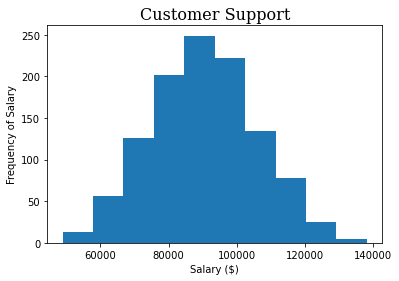

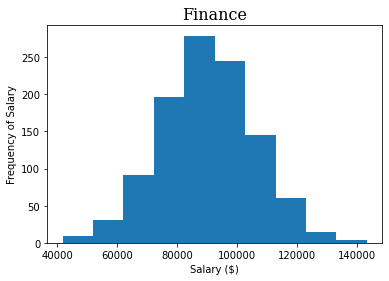

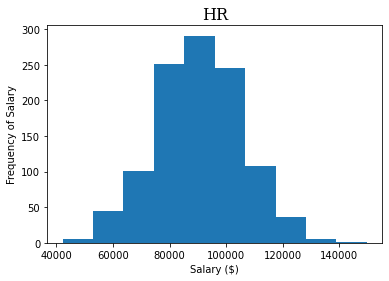

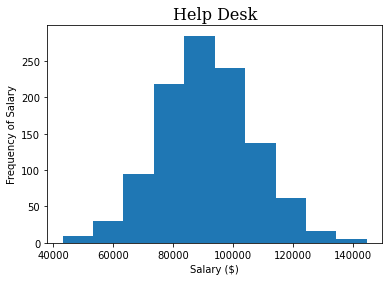

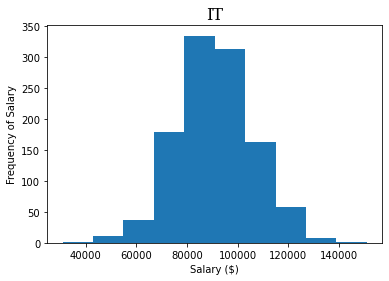

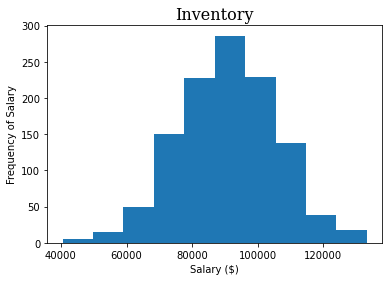

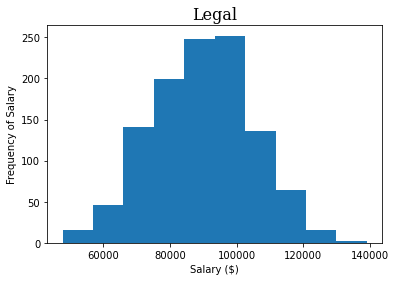

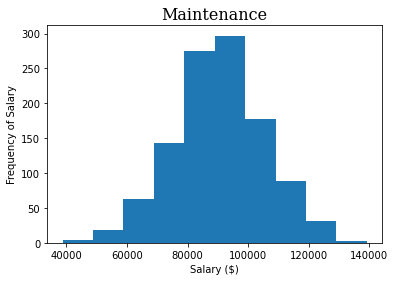

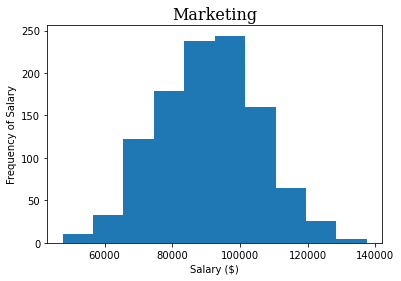

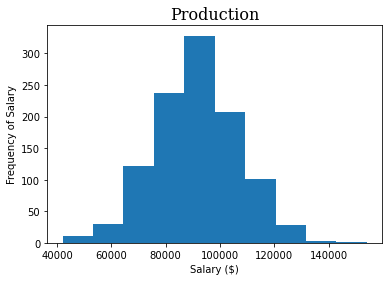

In [27]:
sal_by_dept = join_all.groupby('dept_name')['yr_salary']
for i,j in sal_by_dept:
    plt.hist(j.values)
    plt.title(i, fontdict={'size':16, 'family':'serif'})
    plt.xlabel('Salary ($)')
    plt.ylabel('Frequency of Salary')
    plt.show()

### References:

    1. https://stackoverflow.com/questions/67909945/python-faker-phone-number-formatting
    2. https://pythonsimplified.com/generate-fake-data-using-faker-and-python/
    3. https://stackoverflow.com/questions/52274643/figsize-in-matplotlib-is-not-changing-the-figure-size
    4. https://stackoverflow.com/questions/658763/how-to-suppress-scientific-notation-when-printing-float-values
    5. https://stackoverflow.com/questions/60294463/attributeerror-dataframe-object-has-no-attribute-set-value
        